First, let us import the datasets using pd.read_csv()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth',-1)
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userId', 'location', 'age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userId', 'ISBN', 'book_rating']


<ipython-input-2-a08063ef47d6>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expe

We see that there is mixed datatype warning. We shall take care of this in the next section.


**1. Choose and apply suitable data cleaning methods to clean the data by eliminating redundant values and delete the records with inconsistent values**


Now let us take care of the mixed type issue. Let us check for any inconsistencies. Let us display all the unique values from one column, from each of the dataframes. From users, we shall check the age.

In [534]:
users.age.unique()


array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

We see that there exists NaN values for age. We shall take care of that later. Now let us see book ratings.

In [535]:
ratings.book_rating.unique()


array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

The book ratings looks good. Now let us see the year of publication.

In [536]:
books.year_of_publication.unique()


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see plenty of inconsistencies here. Firstly, there are 0 for some fields. Secondly, some fields have strings. We can see the inconsistencies at "DK Publishing Inc" and "Gallimard". Let us first look at the row where year of publication is "DK Publishing Inc".

In [537]:
books.loc[books.year_of_publication == 'DK Publishing Inc',:]


,ISBN,book_title,book_author,year_of_publication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


We see that the book author has been wrongly entered as a sub-string of book_title. The year_of_publication has been wrongly entered under book_author. The publisher has been wrongly assigned an image link. Let us now assign these values to where they belong, in their respective rows.

In [538]:
books.loc[books.ISBN == '078946697X','year_of_publication'] = 2000
books.loc[books.ISBN == '078946697X','book_author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953', 'year_of_publication'] = 2000
books.loc[books.ISBN == '0789466953', 'book_author'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"


Now let us do the same for "Gallimard".

In [539]:
books.loc[books.year_of_publication == 'Gallimard']


,ISBN,book_title,book_author,year_of_publication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


We can see that same inconsistency here as well. Now let us assign  these values to where they belong.

In [540]:
books.loc[books.ISBN == '2070426769','year_of_publication'] = 2003
books.loc[books.ISBN == '2070426769','book_author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'


Now let us see the unique values from the books column. It should appear right.

In [541]:
books.year_of_publication = pd.to_numeric(books.year_of_publication)
books['year_of_publication'].unique()


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

Now, let us consolidate all the datasets into one, in order to facilitate more simplified analysis. We will be making use of pd.merge() to do so.

In [542]:
data1 = pd.merge(ratings,users,on="userId")
data = pd.merge(data1, books, on='ISBN')
columns = ['imageUrlS', 'imageUrlM', 'imageUrlL']
data = data.drop(columns, axis=1)
print(data.head(5))


   userId        ISBN  book_rating                           location   age  \
0  276725  034545104X  0            tyler, texas, usa                 NaN     
1  2313    034545104X  5            cincinnati, ohio, usa              23.0   
2  6543    034545104X  0            strafford, missouri, usa           34.0   
3  8680    034545104X  5            st. charles county, missouri, usa  2.0    
4  10314   034545104X  9            beaverton, oregon, usa            NaN     

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  2002                 Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  2002                 Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  2002                 Ballantine Books  
3  Flesh Tones: A Novel  M. J. Rose  2002                 Ballantine Books  
4  Flesh Tones: A Novel  M. J. Rose  2002                 Ballantine Books  


Now let us check for NaN/null values

In [543]:
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))


	userId: 0
	ISBN: 0
	book_rating: 0
	location: 0
	age: 277835
	book_title: 0
	book_author: 1
	year_of_publication: 0
	publisher: 2


We see that NaN values are highest in "age"(277835 times). It also occurs once in "book_author" and twice in "publisher".From the latter two columns, these rows can be removed as removing 3 rows from a big dataset will not significantly affect the problem.

In [544]:
print(data.shape)
data = data[data['book_author'].isna()==False] 
data = data[data['publisher'].isna()==False] 
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
print(data.shape)


(1031136, 9)
	userId: 0
	ISBN: 0
	book_rating: 0
	location: 0
	age: 277835
	book_title: 0
	book_author: 0
	year_of_publication: 0
	publisher: 0
(1031133, 9)


 However, the same cannot be done for "age". The number of NaN occurrances are too many. Hence, we shall replace all the values in the column with the mode. The frequency of NaN values are again printed, and it is apparent that they have been taken care of.

In [545]:
data['age'] = data['age'].fillna(float(data['age'].mode()))
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))


	userId: 0
	ISBN: 0
	book_rating: 0
	location: 0
	age: 0
	book_title: 0
	book_author: 0
	year_of_publication: 0
	publisher: 0


Now let us see how many rows exist in "year_of_publication", where its value=0.

In [546]:
data.loc[data['year_of_publication'] == 0].shape[0]


14009

We see that the number of such rows are 14009. This is too many and cannot be deleted, so let us replace all these values with the mode.

In [547]:
data.loc[data['year_of_publication'] == 0, 'year_of_publication'] = data['year_of_publication'].mode()



Let us confirm that there are no rows where year_of_publication is 0.

In [548]:
print(data[data['year_of_publication']==0])


Empty DataFrame
Columns: [userId, ISBN, book_rating, location, age, book_title, book_author, year_of_publication, publisher]
Index: []


**2. Implement methods to fix missing values and to identify the outliers. Eliminate the outliers from the dataset**


Let us see the boxplot to check for outliers.

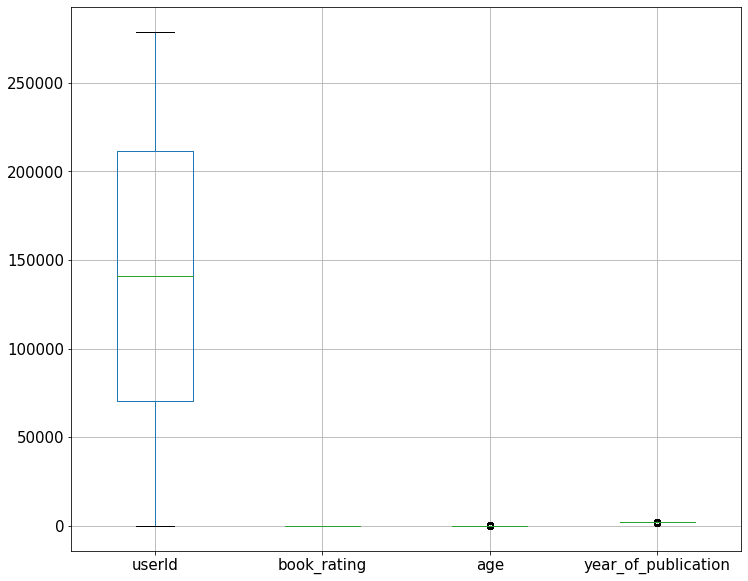

In [549]:
data.boxplot(figsize=(12,10))


We can see that, only columns with numeric datatype are plotted. We shall consider only "age" and "year_of_publication" for normalization, but not the rest as it is seen that they do not contain any outliers. Let us see a more detailed version of the "age" plot.

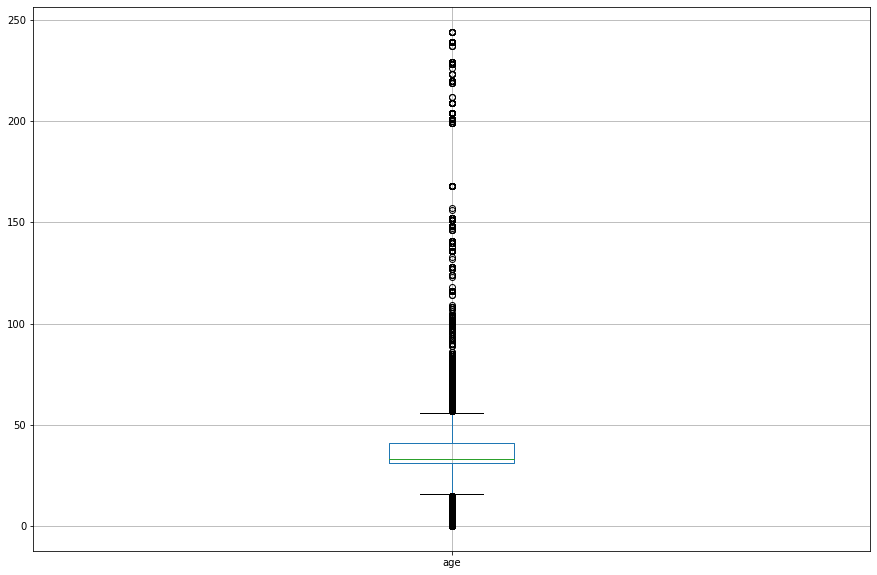

In [550]:
%matplotlib inline
temp1=pd.DataFrame({})
temp1.insert(0,'age',data['age'])
temp1.boxplot(figsize=(15,10))


We can clearly see that there are plenty of outliers. Now let us do the same for the "year_of_publication".

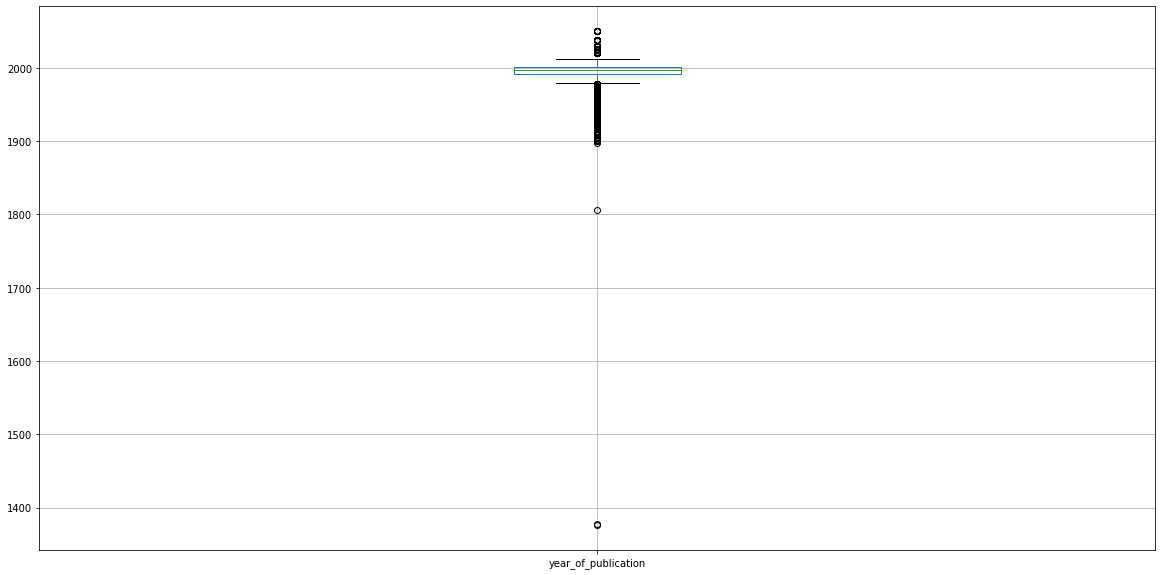

In [551]:
temp2=pd.DataFrame({})
temp2.insert(0,'year_of_publication',data['year_of_publication'])
temp2.boxplot(figsize=(20,10))


It is very apparent that there are plenty of outliers here as well. The count is so high that they do not even appear distinct. Now let us perform normalization on the "age", "year_of_publication" and "book_rating" columns. However, we shall remove outliers considering only "age","year_of_publication". Defined below are functions implemented for each of the normalisation techniques we are going to apply. 

**Outlier elimination**

We shall use z-score normalization



In [552]:
#function for z score normalisation
def z_score(df):
  return (df[['age', 'year_of_publication','book_rating']]-df[['age', 'year_of_publication','book_rating']].mean())/df[['age', 'year_of_publication','book_rating']].std()



Let us write a function to filter out those rows with normalised values between a and b

In [553]:
def filter(df,a,b):
  return df.loc[((df[['year_of_publication','book_rating']]> a).sum(axis=1)==2) & ((df[['year_of_publication','book_rating']] <= b).sum(axis=1)==2),:]


Implementation

In [554]:
zScoreData=data.copy()
temp1=z_score(zScoreData)
zScoreData[['age', 'year_of_publication','book_rating']] = temp1[['age', 'year_of_publication','book_rating']]
zScoreData=filter(zScoreData,-2.5,2.5)
print('Number of rows before discarding outliers = %d\n' % (data.shape[0]))
print(zScoreData.head(3))
print()
print('Number of rows after discarding outliers = %d' % (zScoreData.shape[0]))

#variable zScoreData holds the dataset without the outliers


Number of rows before discarding outliers = 1031133

   userId        ISBN  book_rating                  location       age  \
0  276725  034545104X -0.736618     tyler, texas, usa        -0.263184   
1  2313    034545104X  0.560686     cincinnati, ohio, usa    -1.082382   
2  6543    034545104X -0.736618     strafford, missouri, usa -0.181264   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  

Number of rows after discarding outliers = 995657


From the above, we can see that (1031133 - 1003528 = 27605) rows have been eliminated.

Let us write a function to plot the distribution post each normalization technique.

**3. Design and implement the following data transformation methods and plot the distribution of the data:**

**i. Min-Max Normalization**

**ii. Z-score Standardization**

**iii. Decimal Scaling**

In [555]:
#function to plot distribution after each normalisation
def plot_distribution(attribute,smoothness):
  attribute.plot.kde(bw_method=smoothness)


**1. Min Max Normalization**

```

  Formula:

  data[i]=(data[i]-min)/(max - min)
  
  where, 

  max = maximum value of the attribute of concern

  min = minimum value of the attribute of concern
```



In [556]:

def min_max(df):
  return (df[['age', 'year_of_publication','book_rating']]-df[['age', 'year_of_publication','book_rating']].min())/(df[['age', 'year_of_publication','book_rating']].max()-df[['age', 'year_of_publication','book_rating']].min())


In [557]:
minmaxData=data.copy()
temp2=min_max(minmaxData)
minmaxData[['age', 'year_of_publication','book_rating']] = temp2[['age', 'year_of_publication','book_rating']]
print(minmaxData.head(3))


   userId        ISBN  book_rating                  location       age  \
0  276725  034545104X  0.0          tyler, texas, usa         0.135246   
1  2313    034545104X  0.5          cincinnati, ohio, usa     0.094262   
2  6543    034545104X  0.0          strafford, missouri, usa  0.139344   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  0.928783             Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  0.928783             Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  0.928783             Ballantine Books  


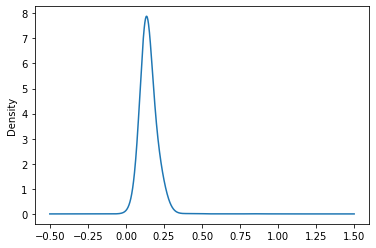

In [558]:
plot_distribution(minmaxData['age'],0.7)


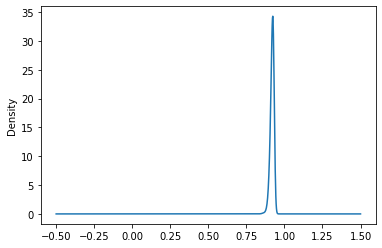

In [559]:
plot_distribution(minmaxData['year_of_publication'],0.7)


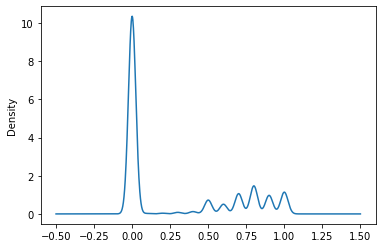

In [560]:
plot_distribution(minmaxData['book_rating'],None)


**2. Z- Score Standardization:**


  Fomula : 

      data[i] = (data[i]−μ)/σ

      where , μ = mean of the attribute and

      σ = standard deviation of the attribute
  ​	

In [561]:
Z=data.copy()
temp2=z_score(Z)#(Z[['age', 'year_of_publication','book_rating']]-Z[['age', 'year_of_publication','book_rating']].mean())/Z[['age', 'year_of_publication','book_rating']].std()
Z[['age', 'year_of_publication','book_rating']] = temp2[['age', 'year_of_publication','book_rating']]
print(Z.head(3))


   userId        ISBN  book_rating                  location       age  \
0  276725  034545104X -0.736618     tyler, texas, usa        -0.263184   
1  2313    034545104X  0.560686     cincinnati, ohio, usa    -1.082382   
2  6543    034545104X -0.736618     strafford, missouri, usa -0.181264   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  0.909417             Ballantine Books  


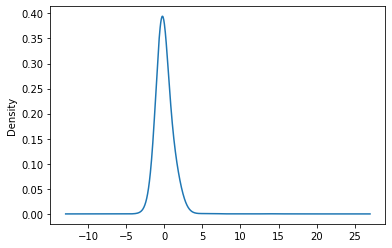

In [562]:
plot_distribution(Z['age'],0.7)


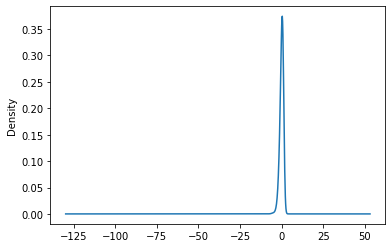

In [563]:
plot_distribution(Z['year_of_publication'],0.7)


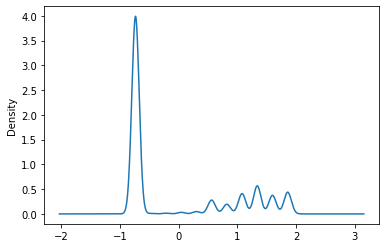

In [564]:
plot_distribution(Z['book_rating'],None)


**3. Decimal Scaling**

  Formula:

```
  data[i]=data[i]/(10^j))

  where,

  j = no. of digits of the maximum value from the attribute of concern, before the decimal point
```

In [565]:
def decimal_scaling(df,jValues):
    return df[['age', 'year_of_publication','book_rating']]/10**jValues[['age', 'year_of_publication','book_rating']]


In [566]:
decimalData=data.copy()
jValues = data.copy()
jValues['age'] = len(str(int(jValues['age'].max())))
jValues['year_of_publication'] = len(str(int(jValues['year_of_publication'].max())))
jValues['book_rating'] = len(str(int(jValues['book_rating'].max())))
temp3=decimalData[['age', 'year_of_publication','book_rating']]/10**jValues[['age', 'year_of_publication','book_rating']]#decimal_scaling(decimalData,jValues)
decimalData[['age', 'year_of_publication','book_rating']] = temp3[['age', 'year_of_publication','book_rating']]
print(decimalData.head(3))


   userId        ISBN  book_rating                  location    age  \
0  276725  034545104X  0.00         tyler, texas, usa         0.033   
1  2313    034545104X  0.05         cincinnati, ohio, usa     0.023   
2  6543    034545104X  0.00         strafford, missouri, usa  0.034   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  0.2002               Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  0.2002               Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  0.2002               Ballantine Books  


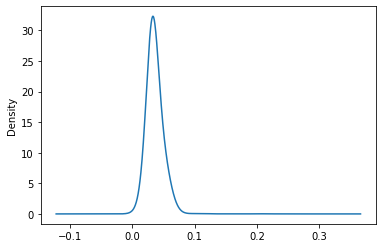

In [567]:
plot_distribution(decimalData['age'],0.7)


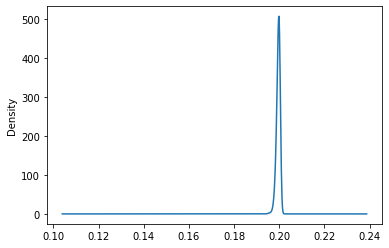

In [568]:
plot_distribution(decimalData['year_of_publication'],0.7)


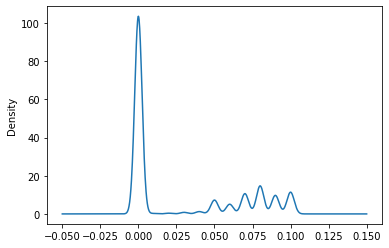

In [569]:
plot_distribution(decimalData['book_rating'],None)


**Study and discuss how normality of data can be achieved using any two of the following transformation techniques:**

**i. Square root transformation**

**ii. Natural Log transformation**

**iii. Inverse square root transformation**

We shall be discussing Square root and Natural Log transformation

Data transformation refers to replacing each data pointin the dataframe by a value determined by a function. This function needs to be pre-determined.
Pros of transformation are-
1. Transformation increases the extent to which one can draw statistical inferences from the data.
2. Graphs plotted post transformation are more descriptive.
3. Normalises the data, which helps indentify outliers
4. Log and square root transformations help remove/reduce skewness


**We shall use the z score normalised data for these transformations**

First let us prepare our dataset for transformation.

 Since we are discussing Natural log and inverse square transformations, which are meant for positive values only, We need to take care of negative values from the normalised data obtained earlier

 Let us see how many negative values are there


In [570]:
print(zScoreData[['age', 'year_of_publication','book_rating']].min())


age                   -2.966539
year_of_publication   -2.485548
book_rating           -0.736618
dtype: float64


We see that there are negative values in all the three columns. We shall hence add a constant value to each of the columns. That shall be equal to the ceiling value of the abs(minimum values).

i.e 

all values in age column shall be replced by the ceil(abs(-2.966539)), which is  +3

all values in year_of_publication column shall be replced by the ceil(abs(-83.828918)), which is  +84

all values in year_of_publication column shall be replced by the ceil(abs(-0.736618)), which is  +1

In [571]:
normalisedData = zScoreData.copy()
constant = np.ceil(abs(normalisedData[['age', 'year_of_publication','book_rating']].min()))
normalisedData['age'] = normalisedData['age']+constant['age']
normalisedData['year_of_publication'] = normalisedData['year_of_publication']+constant['year_of_publication']
normalisedData['book_rating'] = normalisedData['book_rating']+constant['book_rating']


Now, let us check if there are any negative values

In [572]:
print(normalisedData[['age','year_of_publication','book_rating']].min())


age                    0.033461
year_of_publication    0.514452
book_rating            0.263382
dtype: float64


We see that there are no negative numbers. Now that our data is suitable for normalisation, let us proceed.

1. Square root transformation: 
Square root transformation is used for count data i.e data that follow a Poisson distribution, or small whole numbers. It can also be applied to percentage data where the range is between 0 and 20% or between 80 and 100%.In this transformation, each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.However, it is weaker than the logarithmic and the cube root transformations. 

        Datapoint[i]=(Datapoint[i])^0.5

  Now let us implement this transformation to the dataset. Since none of the values are negative, we can apply this transformation without any complications.

In [573]:
def square_root_transformation(df):
  return df[['age', 'year_of_publication','book_rating']]**0.5


In [574]:
sqrtData=normalisedData.copy()
sqrtData[['age', 'year_of_publication','book_rating']] = square_root_transformation(sqrtData)
print(sqrtData.head(3))


   userId        ISBN  book_rating                  location       age  \
0  276725  034545104X  0.513208     tyler, texas, usa         1.654333   
1  2313    034545104X  1.249274     cincinnati, ohio, usa     1.384781   
2  6543    034545104X  0.513208     strafford, missouri, usa  1.678909   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  1.977225             Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  1.977225             Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  1.977225             Ballantine Books  


Now let us check the skewness post Square root transformation.

Before

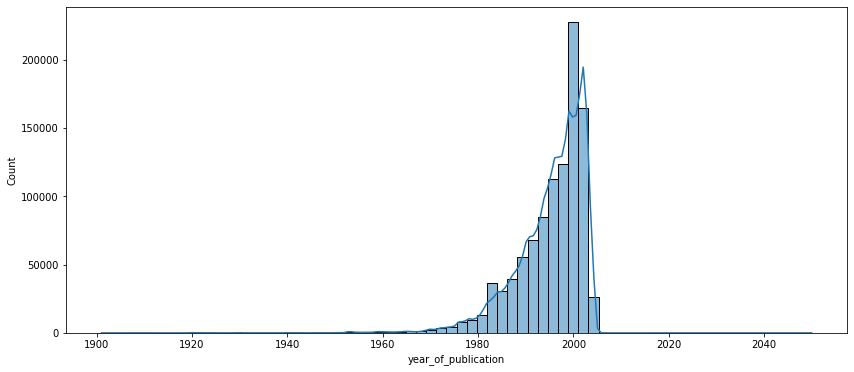

In [575]:
plt.figure(figsize=(14, 6))
test=data[data['year_of_publication']>1900]#filtering, as it looks more descriptive this way
sns.histplot(data=test, x="year_of_publication",bins=70,kde=True)


After

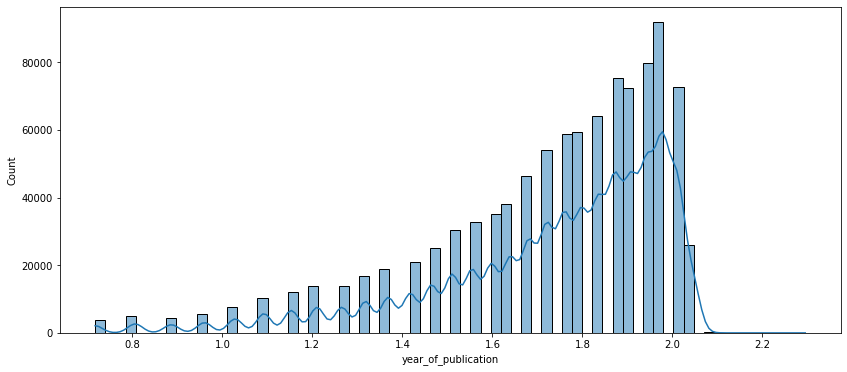

In [576]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.histplot(data=sqrtData, x="year_of_publication",bins=70,kde=True) 


We can see that skewness is slightly lesser after applying the transformation.

**2. Natural Log Transformation:**

In natural log transformation, each value in the dataframe is replaced by its logrithmic counterpart. The base used should be 'e'.The log transformation reduces or removes the skewness from the original dataset. However, the original dataset has to follow or approximately follow a log-normal distribution. Else, the expected result of removing skewness wont work.

  Now let us implement this transformation to the normalised dataset.

In [577]:
import numpy as np
#added 0.00000000001 to avoid divide by 0 warning
def natural_log_transformation(df):
  return np.log(df[['age', 'year_of_publication','book_rating']])


In [578]:

logData=normalisedData.copy()
logData[['age', 'year_of_publication','book_rating']] = natural_log_transformation(logData)
print(logData.head(3))


   userId        ISBN  book_rating                  location       age  \
0  276725  034545104X -1.334148     tyler, texas, usa         1.006795   
1  2313    034545104X  0.445125     cincinnati, ohio, usa     0.651084   
2  6543    034545104X -1.334148     strafford, missouri, usa  1.036289   

             book_title book_author  year_of_publication         publisher  
0  Flesh Tones: A Novel  M. J. Rose  1.363388             Ballantine Books  
1  Flesh Tones: A Novel  M. J. Rose  1.363388             Ballantine Books  
2  Flesh Tones: A Novel  M. J. Rose  1.363388             Ballantine Books  


Now let us check the skewness for "year_of_publication", post log transformation.

Before

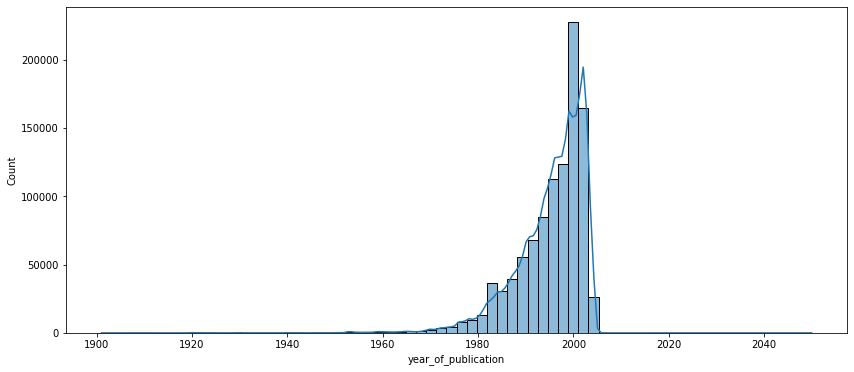

In [579]:
plt.figure(figsize=(14, 6))
test=data[data['year_of_publication']>1900]#filtering, as it looks more descriptive this way
sns.histplot(data=test, x="year_of_publication",bins=70,kde=True)


After

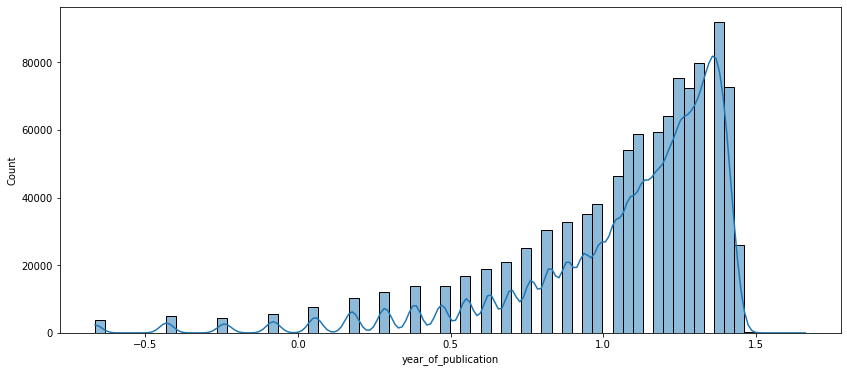

In [580]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.histplot(data=logData, x="year_of_publication",bins=70,kde=True) 


We can see that the skewness is slightly lesser after applying the transformation


**5. Perform exploratory data analysis with appropriate visualization and interpret the results obtained in the above tasks**

1. Book ratings: Let us plot a histogram to see how the book ratings are distributed.

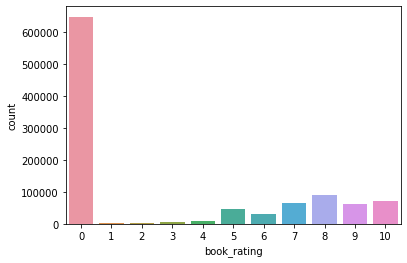

In [581]:
import seaborn as sns
sns.countplot(x=data['book_rating'])


We see that, most of the books are implicit, i.e have 0 ratings.

 We can also see that there are lots of books that have high rating(8-10) and fewer books with average rating(6-7) and even fewer books with low ratings(below 6)

 Now let us see some scatter plots with the numeric columns.

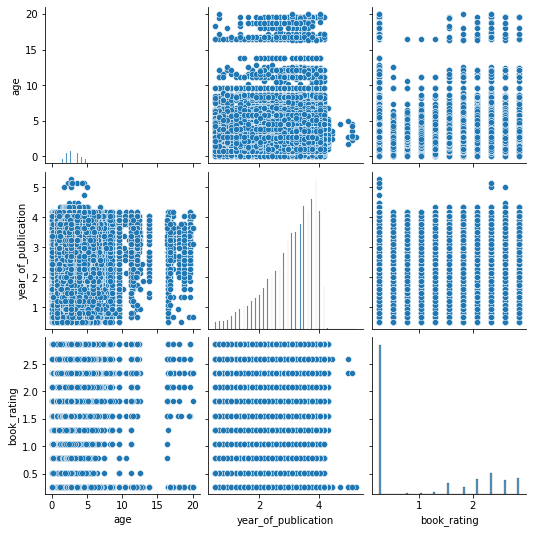

In [582]:
import seaborn as sns
sns.pairplot(
    normalisedData,
    x_vars=['age', 'year_of_publication','book_rating'],
    y_vars=['age', 'year_of_publication','book_rating'],
)


As we can see, nothing conclusive can be said from the above.



Now, Let us analyse the plot for the "year_of_publication". We shall analyse the books released only after 1900 for a better picture.

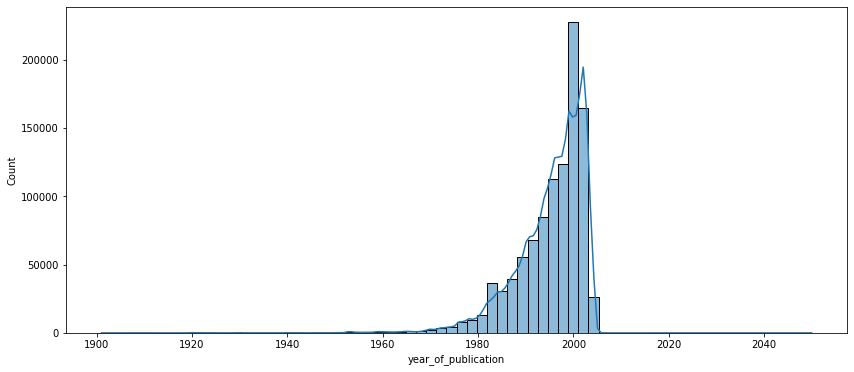

In [583]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
years=data[data['year_of_publication']>1900]
sns.histplot(data=years, x="year_of_publication",bins=70,kde=True)


We can see that it follows a normal distribution, which appears to be left skewed. It can conclusively said that most of the books under consideration, have been published around year 2000.

Now let us analyse the "age".

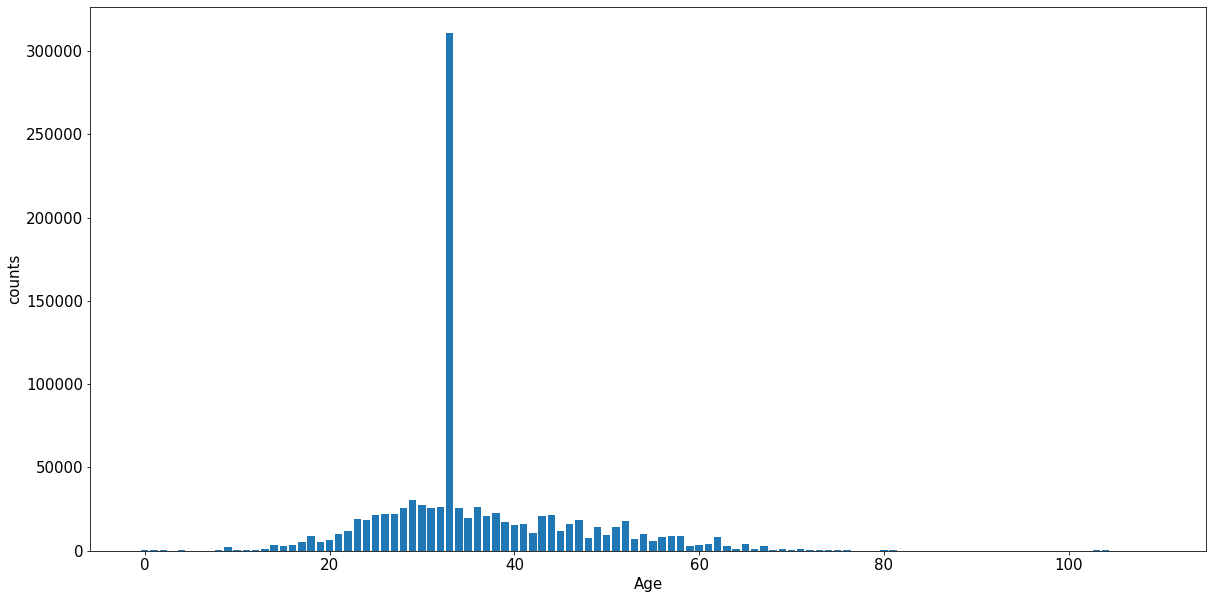

Most users 310697 for age 33


In [584]:
ageData = data[data['age']<110]
ageHist = ageData.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) 
plt.bar(ageHist.index, ageHist.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()
max_age=[i for i in range(ageHist.shape[0]) if ageHist.get(i) ==ageHist.max()][0]
print('Most users %d for age %d'% (ageHist.max(),max_age))


We can see that, most of the users under consideration are young to middle aged(30-40). There are fewer user that fall outside this category. We can also see that, most of them are 33 years old.

Now, let us see how frequent a user has rated a book. We shall aggregate using "userId" and "ISBN".

In [585]:
def plot_bar(dseries,title):
  dobj = {title: dseries.index.tolist(), 'count': dseries.values.tolist()}
  df = pd.DataFrame(data=dobj,index=[item for item in range(0, len(d[title]))] )
  g=sns.barplot(x=title, y="count", data=df)
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
  


In [586]:
most_ratings = zScoreData.groupby('userId').ISBN.count().sort_values(ascending=False)
print(most_ratings.head(5))


userId
11676     10679
198711    6124 
98391     5777 
153662    5740 
35859     5565 
Name: ISBN, dtype: int64


We see that userId=11676 has rated almost twice the rest. Now let us see how many users have rated a lot, and how many users have rated fewer times.

1. No. of users with ratings >800

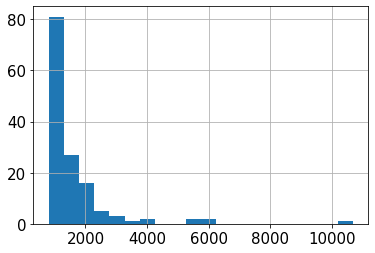

In [587]:
most_ratings[most_ratings>800].hist(bins=20)


We see that, user who have provided most ratings(greater than 800) are fewer in number, around 80 and it keeps decreasing. Meaning, users who rate books a lot are lesser.

2.No. of users with ratings < 50

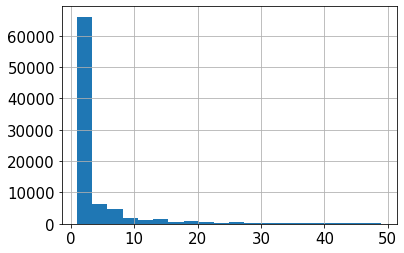

In [588]:
most_ratings[most_ratings<50].hist(bins=20)


We can see that, around 1 or 2 users have rated around 60000 books. This is a huge number when compared to the previous analysis. 

Thus it can conclusively be saidd that a vast majority of the books, have been rated by 1 or 2 users only. A small fraction of the users rate many books.

Now let us try to find out the most popular books. We shall find the sum of all the ratings for each book title, by performing aggregation with "book_title" and "book_rating", based on the sum of the ratings for each book.


                                         book_title       count
0  The Lovely Bones: A Novel                         547.578814
1  The Da Vinci Code                                 420.945337
2  Harry Potter and the Chamber of Secrets (Book 2)  338.206123


[Text(0, 0, 'The Lovely Bones: A Novel'),
 Text(0, 0, 'The Da Vinci Code'),
 Text(0, 0, 'Harry Potter and the Chamber of Secrets (Book 2)'),
 Text(0, 0, 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 Text(0, 0, 'The Secret Life of Bees'),
 Text(0, 0, "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"),
 Text(0, 0, 'Harry Potter and the Goblet of Fire (Book 4)'),
 Text(0, 0, 'The Red Tent (Bestselling Backlist)'),
 Text(0, 0, 'To Kill a Mockingbird'),
 Text(0, 0, 'Harry Potter and the Order of the Phoenix (Book 5)')]

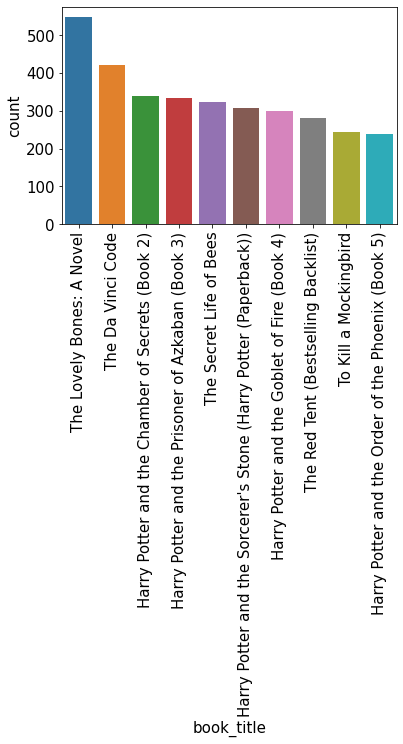

In [589]:
most_popular = zScoreData.groupby('book_title').book_rating.sum().sort_values(ascending=False).head(10)
d = {'book_title': most_popular.index.tolist(), 'count': most_popular.values.tolist()}
df = pd.DataFrame(data=d,index=[item for item in range(0, len(d['book_title']))] )
print(df.head(3))
g=sns.barplot(x="book_title", y="count", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


We can see that, The Lovely Bones is the highest rated book and the most popular. It has been significantly rated compared to the others.

We have finally found out the top ten most popular books.

     book_author        count
0  Stephen King   1994.205138
1  J. K. Rowling  1921.588261
2  Dan Brown      684.579212 


[Text(0, 0, 'Stephen King'),
 Text(0, 0, 'J. K. Rowling'),
 Text(0, 0, 'Dan Brown'),
 Text(0, 0, 'Neil Gaiman'),
 Text(0, 0, 'Alice Sebold'),
 Text(0, 0, 'Janet Evanovich'),
 Text(0, 0, 'John Grisham'),
 Text(0, 0, 'Terry Pratchett'),
 Text(0, 0, 'J. R. R. Tolkien'),
 Text(0, 0, 'Barbara Kingsolver')]

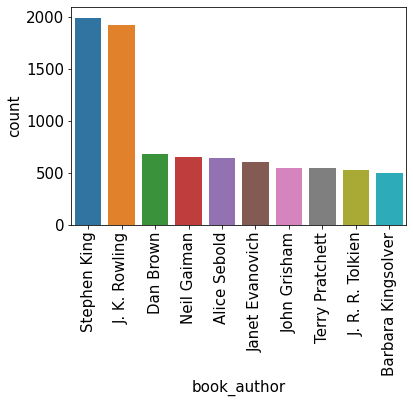

In [590]:
most_popular_author = zScoreData.groupby('book_author').book_rating.sum().sort_values(ascending=False).head(10)
d = {'book_author': most_popular_author.index.tolist(), 'count': most_popular_author.values.tolist()}
df = pd.DataFrame(data=d,index=[item for item in range(0, len(d['book_author']))] )
print(df.head(3))
g=sns.barplot(x="book_author", y="count", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


We can see that Stephen King is the most popular author.

We have finally found out the top ten most popular authors.

Since Stephen King is found to be the most popular author, and "The Lovely Bones:A Novel" was found out to be the most popular book, does this mean that the book was written by Stephen King? Let us find out

In [592]:
zScoreData[zScoreData['book_title'].str.contains('The Lovely Bones')].head(3)


,userId,ISBN,book_rating,location,age,book_title,book_author,year_of_publication,publisher
6574,276925,0316666343,-0.736618,"barcelona, barcelona, spain",-1.164302,The Lovely Bones: A Novel,Alice Sebold,0.909417,"Little, Brown"
6575,277195,0316666343,-0.736618,"san francisco, california, usa",1.457133,The Lovely Bones: A Novel,Alice Sebold,0.909417,"Little, Brown"
6576,277413,0316666343,-0.736618,"norfolk, virginia, usa",1.620972,The Lovely Bones: A Novel,Alice Sebold,0.909417,"Little, Brown"


We can see that "The Lovely Bones: A Novel" was written by Alice Sebold and not Stephen King. Infact, Alice Sebol does not even come under the top ten list as seen in the above plot.

Conclusively, just because a book is popular, it does not mean that the author is too. It might or might not be the case. Books and authors do have an intersection when it comes to popularity. However, they must also be analysed separately.

**Summary**
1. Data Selection
  The dataset was already presented as 3 csv files. These were each imported as a pandas dataframe.

1. Data preprocessing
 Some inconsistency from the datasets was removed. They were then merged (aggregation). Some null values were detected. These rows were removed if they were fewer in number. Else they were replaced with the mode.

  1.1 Outliers
  Outliers were identified using the boxplot and removed using z score normalisation

  1.2 Normalisation
  The data was normalised by performing MinMax normalization,  Z- Score normalization and Decimal scaling.

2. Data Transformation: 
The normalised data was transformed using square root and natural log transformation.

3. Data visualisation: 
Exploratory data analysis was then performed on the dataset where we could dig out certain facts from the dataset.

**Conclusion**: 

  Data preprocessing and data transformation techniques were understood and implemented using python. It was slightly simpler for our dataset with around 10 lakh values. For bigger datasets, the complexity is multifold. Conclusively, it can be said that the preprocessing stage plays a vital role in building the model. Unprocessed data leads to invalid and unreliable predictions.